In [1]:
from collections import OrderedDict
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
design_outputs = OrderedDict()

## Wind & Battery & PEM

Assuming existing wind farm of 200 MW

Text(0.5, 0, 'H2 price [$/kg]')

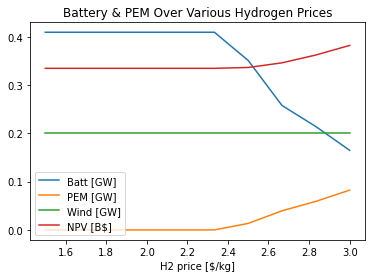

In [39]:
h2_prices = np.linspace(1.5, 3, 10)
cols = [str(i) for i in h2_prices]
wind_battery_pem_res = pd.read_json("wind_battery_PEM_LMP_h2_prices_windfixed.json", orient='index', convert_axes=False)
wind_battery_pem_res['pem_ratio'] = wind_battery_pem_res.apply(lambda row: row.pem/(row.pem + row.batt), axis=1)

plt.plot(h2_prices, wind_battery_pem_res['batt'] * 1e-3, label="Batt [GW]")
plt.plot(h2_prices, wind_battery_pem_res['pem'] * 1e-3, label="PEM [GW]")
plt.plot(h2_prices, [200 * 1e-3] * len(h2_prices), label="Wind [GW]")
# plt.plot(h2_prices, wind_battery_pem_res['pem_ratio'], label="PEM ratio")
plt.plot(h2_prices, wind_battery_pem_res['npv'] * 1e-9, label="NPV [B$]")
plt.legend(loc='lower left')
plt.title("Battery & PEM Over Various Hydrogen Prices")
plt.xlabel("H2 price [$/kg]")

## Wind + Battery + PEM

Assuming greenfield with max 1GW wind

Text(0.5, 0, 'H2 price [$/kg]')

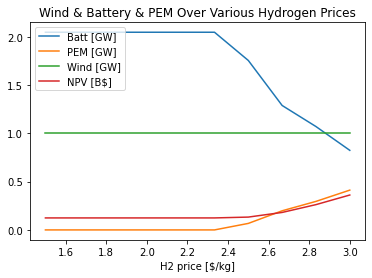

In [43]:
h2_prices = np.linspace(1.5, 3, 10)
cols = [str(i) for i in h2_prices]
wind_battery_pem_res = pd.read_json("wind_battery_PEM_LMP_h2_prices.json", orient='index', convert_axes=False)
wind_battery_pem_res['pem_ratio'] = wind_battery_pem_res.apply(lambda row: row.pem/(row.pem + row.batt), axis=1)

plt.plot(h2_prices, wind_battery_pem_res['batt'] * 1e-3, label="Batt [GW]")
plt.plot(h2_prices, wind_battery_pem_res['pem'] * 1e-3, label="PEM [GW]")
plt.plot(h2_prices, [1000 * 1e-3] * len(h2_prices), label="Wind [GW]")
# plt.plot(h2_prices, wind_battery_pem_res['pem_ratio'], label="PEM ratio")
plt.plot(h2_prices, wind_battery_pem_res['npv'] * 1e-9, label="NPV [B$]")
plt.legend(loc='upper left')
plt.title("Wind & Battery & PEM Over Various Hydrogen Prices")
plt.xlabel("H2 price [$/kg]")

## Wind + Battery + PEM Over Different Time Horizons

Assuming existing wind farm of 200 MW

    h2_price     batt_mw        pem_mw    h2_rev      elec_rev           NPV  \
0        2.0  409.595346  0.000000e+00  0.000000  1.033776e+06  3.348522e+08   
1        2.0  321.034786  0.000000e+00  0.000000  1.844819e+06  2.935189e+08   
2        2.0  143.155338  8.000000e-09  0.000211  1.918327e+06  1.811167e+08   
3        2.0  498.671132  7.666110e-05       NaN           NaN  4.656960e+08   
4        2.0   24.219033  6.055445e-02       NaN           NaN  3.065218e+08   
5        2.0    2.378095  8.990312e-01       NaN           NaN  2.134062e+08   
6        2.5  361.191450  1.348132e+01       NaN           NaN  3.387295e+08   
7        2.5  208.762181  3.894427e+01       NaN           NaN  3.045108e+08   
8        2.5   92.434619  5.816481e+01       NaN           NaN  2.035591e+08   
9        2.5  498.670867  1.506739e-04       NaN           NaN  4.656942e+08   
10       2.5  152.266437  1.343000e+01       NaN           NaN  3.508508e+08   

      ts  model_creation  model_vars  t

Text(0.5, 1.0, 'Short FS: Solution Time vs Time Horizon')

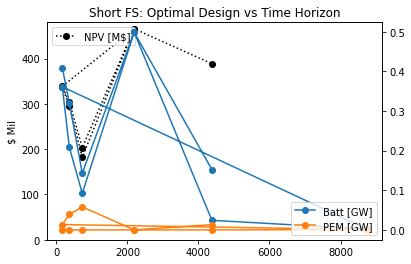

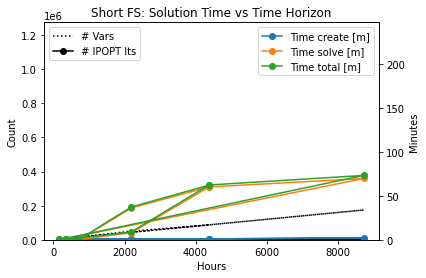

In [10]:
# Rerun first 3
wind_battery_pem_res = pd.read_json("wind_battery_PEM_LMP_timehorz.json", orient='index', convert_axes=False)
wind_battery_pem_res.sort_index()
print(wind_battery_pem_res)

max_time = max(wind_battery_pem_tank_turb_res['total_run_time'] / 60) * 1.05
max_vars = max(wind_battery_pem_tank_turb_res['model_vars']) * 1.05
fig, ax1 = plt.subplots(1, 1)
ax1.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['NPV'] * 1e-6, color='k', marker='o', linestyle=':', label = "NPV [M$]")
ax1.legend(loc='upper left')
ax1.set_ylabel("$ Mil")
ax1.set_ylim((0, None))
ax2 = ax1.twinx()
ax2.plot(wind_battery_pem_res['ts'], wind_battery_pem_res['batt_mw'] * 1e-3, marker='o', label = "Batt [GW]")
ax2.plot(wind_battery_pem_res['ts'], wind_battery_pem_res['pem_mw'] * 1e-3, marker='o', label = "PEM [GW]")
ax2.legend(loc='lower right')
plt.xlabel("Hours")
plt.title("Short FS: Optimal Design vs Time Horizon")

fig, ax1 = plt.subplots(1, 1)
ax1.plot(wind_battery_pem_res['ts'], wind_battery_pem_res['model_vars'], color='k', linestyle=':', label = "# Vars")
ax1.plot(wind_battery_pem_res['ts'], wind_battery_pem_res['ipopt_its'], color='k', marker='o', label = "# IPOPT Its")
ax1.set_xlabel("Hours")
ax1.set_ylabel("Count")
ax1.set_ylim(0, max_vars)
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(wind_battery_pem_res['ts'], wind_battery_pem_res['model_creation'] / 60, marker='o', label = "Time create [m]")
ax2.plot(wind_battery_pem_res['ts'], wind_battery_pem_res['ipopt_time'] / 60, marker='o', label = "Time solve [m]")
ax2.plot(wind_battery_pem_res['ts'], wind_battery_pem_res['total_run_time'] / 60, marker='o', label = "Time total [m]")
ax2.set_ylim(0, max_time)
ax2.set_ylabel("Minutes")
ax2.legend(loc='upper right')
plt.title("Short FS: Solution Time vs Time Horizon")

In [13]:
# Linux
wind_battery_pem_res = pd.read_json("wind_battery_PEM_LMP_timehorz_linux.json", orient='index', convert_axes=False)
wind_battery_pem_res.sort_index()
wind_battery_pem_res.drop(wind_battery_pem_res[wind_battery_pem_res['ipopt_solved'] != True].index, inplace = True)
wind_battery_pem_res
# print(wind_battery_pem_res)

# max_time = 240 * 1.05
# max_vars = max(wind_battery_pem_tank_turb_res['model_vars']) * 1.05
# fig, ax1 = plt.subplots(1, 1)
# ax1.plot(wind_battery_pem_res['ts'], wind_battery_pem_res['NPV'] * 1e-6, color='k', marker='o', linestyle=':', label = "NPV [M$]")
# ax1.legend(loc='upper left')
# ax1.set_ylabel("$ Mil")
# ax1.set_ylim((0, None))
# ax2 = ax1.twinx()
# ax2.plot(wind_battery_pem_res['ts'], wind_battery_pem_res['batt_mw'] * 1e-3, marker='o', label = "Batt [GW]")
# ax2.plot(wind_battery_pem_res['ts'], wind_battery_pem_res['pem_mw'] * 1e-3, marker='o', label = "PEM [GW]")
# ax2.legend(loc='lower right')
# plt.xlabel("Hours")
# plt.title("Short FS: Optimal Design vs Time Horizon")

# fig, ax1 = plt.subplots(1, 1)
# ax1.plot(wind_battery_pem_res['ts'], wind_battery_pem_res['model_vars'], color='k', linestyle=':', label = "# Vars")
# ax1.plot(wind_battery_pem_res['ts'], wind_battery_pem_res['ipopt_its'], color='k', marker='o', label = "# IPOPT Its")
# ax1.set_xlabel("Hours")
# ax1.set_ylabel("Count")
# ax1.set_ylim(0, max_vars)
# ax1.legend(loc='upper left')
# ax2 = ax1.twinx()
# ax2.plot(wind_battery_pem_res['ts'], wind_battery_pem_res['model_creation'] / 60, marker='o', label = "Time create [m]")
# ax2.plot(wind_battery_pem_res['ts'], wind_battery_pem_res['ipopt_time'] / 60, marker='o', label = "Time solve [m]")
# ax2.plot(wind_battery_pem_res['ts'], wind_battery_pem_res['total_run_time'] / 60, marker='o', label = "Time total [m]")
# ax2.set_ylim(0, max_time)
# ax2.set_ylabel("Minutes")
# ax2.legend(loc='upper right')
# plt.title("Short FS: Solution Time vs Time Horizon")

,wind_mw,batt_mw,pem_mw,annual_rev_h2,annual_rev_E,NPV,h2_price,ts,model_creation,model_vars,total_run_time,ipopt_solved,ipopt_its,ipopt_time,ipopt_reg
0,200,409.595342,1.661000e-07,4.304149e-02,5.375633e+07,3.348522e+08,2.0,168,2.860806,3864,5.197629,True,160,1.740,-6.4
1,200,321.034784,6.391000e-07,1.771307e-01,4.415436e+07,2.935189e+08,2.0,365,5.957449,8395,43.314513,True,240,36.057,-8.3
2,200,143.155337,4.620200e-06,1.278170e+00,2.295685e+07,1.811167e+08,2.0,730,11.991896,16790,54.928172,True,418,40.285,-8.8
3,200,498.671226,6.216580e-05,1.404476e+01,6.903149e+07,4.656960e+08,2.0,2190,36.577021,50370,1669.454926,True,1124,1624.034,-4.5
6,200,361.191468,1.348132e+01,4.631235e+06,4.688664e+07,3.387295e+08,2.5,168,40.929067,3192,43.042464,True,171,1.472,-
7,200,208.762193,3.894427e+01,1.269417e+07,2.743010e+07,3.045108e+08,2.5,365,90.328256,6935,102.971590,True,210,11.390,-
8,200,92.434645,5.816481e+01,1.707028e+07,9.481557e+06,2.035591e+08,2.5,730,203.769727,13870,244.949195,True,281,38.562,-
9,200,498.670392,2.346966e-04,7.178941e+01,6.903138e+07,4.656961e+08,2.5,2190,576.122110,41610,4649.576436,True,1456,4058.306,-6.4
11,200,152.264978,5.836989e+00,1.904792e+06,2.620605e+07,2.410886e+08,2.5,8736,2360.349124,165984,4826.000805,True,4507,2413.968,-
12,200,164.906052,8.244384e+01,2.834148e+07,1.814314e+07,3.842770e+08,3.0,168,49.279836,3192,50.963714,True,116,1.016,-


## Wind + Battery + PEM + Tank + Turbine

Assuming existing wind farm of 200 MW

   wind_mw     batt_mw    pem_mw  tank_kgH2   turb_mw  avg_turb_eff  \
0      200  418.550499  0.000025   0.003228  0.000048      0.339370   
1      200  321.034612  0.000087   0.006160  0.000051      0.338846   
2      200  143.155288  0.000596   0.012080  0.000057      0.337863   
3      200  498.671216  0.000199   0.036641  0.000129      0.334526   

   annual_rev_h2  annual_rev_E           NPV  h2_price    ts  model_creation  \
0     -56.933312  5.445471e+07  3.371428e+08         2   168       36.217846   
1     -39.916096  4.415433e+07  2.953845e+08         2   365       88.284120   
2      99.395274  2.295674e+07  1.820860e+08         2   730      169.618183   
3     -39.744556  6.903147e+07  4.656946e+08         2  2190      370.872214   

   model_vars  total_run_time  ipopt_solved  ipopt_its  ipopt_time ipopt_reg  
0       47210      172.678785          True        828     107.109         -  
1      102567      537.371253          True       1057     383.451     -15.5  
2     

Text(0.5, 1.0, 'Full FS: Solution Time vs Time Horizon')

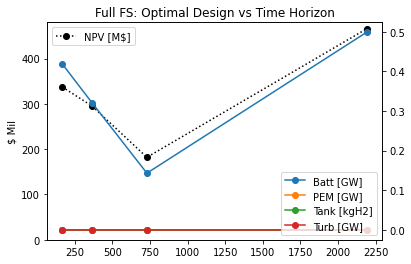

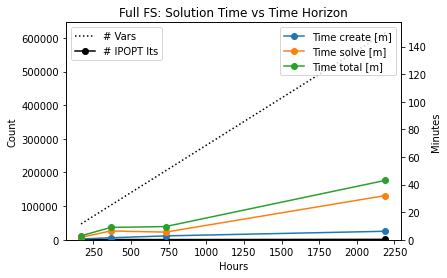

In [155]:
wind_battery_pem_tank_turb_res = pd.read_json("wind_battery_PEM_tank_turbine_LMP_timehorz.json", orient='index', convert_axes=False)
wind_battery_pem_tank_turb_res.sort_index()
print(wind_battery_pem_tank_turb_res)

fig, ax1 = plt.subplots(1, 1)
ax1.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['NPV'] * 1e-6, color='k', marker='o', linestyle=':', label = "NPV [M$]")
ax1.legend(loc='upper left')
ax1.set_ylabel("$ Mil")
ax1.set_ylim((0, None))
ax2 = ax1.twinx()
ax2.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['batt_mw'] * 1e-3, marker='o', label = "Batt [GW]")
ax2.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['pem_mw'] * 1e-3, marker='o', label = "PEM [GW]")
ax2.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['tank_kgH2'] * 1e-3, marker='o', label = "Tank [kgH2]")
ax2.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['turb_mw'] * 1e-3, marker='o', label = "Turb [GW]")
ax2.legend(loc='lower right')
plt.xlabel("Hours")
plt.title("Full FS: Optimal Design vs Time Horizon")

fig, ax1 = plt.subplots(1, 1)
ax1.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['model_vars'], color='k', linestyle=':', label = "# Vars")
ax1.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['ipopt_its'], color='k', marker='o', label = "# IPOPT Its")
ax1.set_xlabel("Hours")
ax1.set_ylabel("Count")
ax1.legend(loc='upper left')
ax1.set_ylim(0, max_vars)
ax2 = ax1.twinx()
ax2.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['model_creation'] / 60, marker='o', label = "Time create [m]")
ax2.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['ipopt_time'] / 60, marker='o', label = "Time solve [m]")
ax2.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['total_run_time'] / 60, marker='o', label = "Time total [m]")
ax2.set_ylabel("Minutes")
ax2.set_ylim(0, max_time)
ax2.legend(loc='upper right')
plt.title("Full FS: Solution Time vs Time Horizon")

    wind_mw     batt_mw     pem_mw  tank_kgH2   turb_mw  avg_turb_eff  \
0       200  418.550499   0.000025   0.003228  0.000048      0.339370   
1       200  321.034612   0.000087   0.006169  0.000051      0.338846   
2       200  143.155288   0.000596   0.012081  0.000057      0.337863   
3       200  498.671216   0.000199   0.036625  0.000129      0.334526   
6       200  361.191467  13.481324   0.003228  0.000047      0.339433   
7       200  208.762193  38.944275   0.006169  0.000050      0.339015   
8       200   92.434637  58.164811   0.012074  0.000054      0.338239   
9       200  498.669304   0.000603   0.036651  0.000084      0.335265   
10      200  330.585597   0.003396   0.073680  0.000136      0.330248   

    annual_rev_h2  annual_rev_E           NPV  h2_price    ts  model_creation  \
0   -5.693330e+01  5.445471e+07  3.371428e+08       2.0   168       27.036845   
1   -3.991611e+01  4.415433e+07  2.953845e+08       2.0   365       58.642526   
2    9.939527e+01  2.29567

Text(0.5, 1.0, 'Full FS: Solution Time vs Time Horizon')

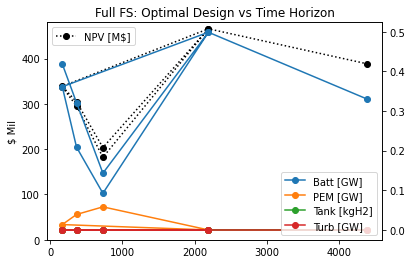

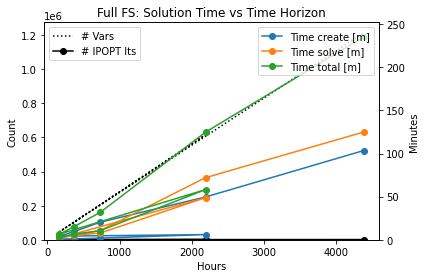

In [8]:
# linux, no memory constraints
wind_battery_pem_tank_turb_res = pd.read_json("wind_battery_PEM_tank_turbine_LMP_timehorz_linux.json", orient='index', convert_axes=False)
wind_battery_pem_tank_turb_res.sort_index()
wind_battery_pem_tank_turb_res.drop(wind_battery_pem_tank_turb_res[wind_battery_pem_tank_turb_res['ipopt_solved'] != True].index, inplace = True)
print(wind_battery_pem_tank_turb_res)

fig, ax1 = plt.subplots(1, 1)
ax1.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['NPV'] * 1e-6, color='k', marker='o', linestyle=':', label = "NPV [M$]")
ax1.legend(loc='upper left')
ax1.set_ylabel("$ Mil")
ax1.set_ylim((0, None))
ax2 = ax1.twinx()
ax2.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['batt_mw'] * 1e-3, marker='o', label = "Batt [GW]")
ax2.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['pem_mw'] * 1e-3, marker='o', label = "PEM [GW]")
ax2.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['tank_kgH2'] * 1e-3, marker='o', label = "Tank [kgH2]")
ax2.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['turb_mw'] * 1e-3, marker='o', label = "Turb [GW]")
ax2.legend(loc='lower right')
plt.xlabel("Hours")
plt.title("Full FS: Optimal Design vs Time Horizon")

fig, ax1 = plt.subplots(1, 1)
ax1.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['model_vars'], color='k', linestyle=':', label = "# Vars")
ax1.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['ipopt_its'], color='k', marker='o', label = "# IPOPT Its")
ax1.set_xlabel("Hours")
ax1.set_ylabel("Count")
ax1.legend(loc='upper left')
ax1.set_ylim(0, max_vars)
ax2 = ax1.twinx()
ax2.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['model_creation'] / 60, marker='o', label = "Time create [m]")
ax2.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['ipopt_time'] / 60, marker='o', label = "Time solve [m]")
ax2.plot(wind_battery_pem_tank_turb_res['ts'], wind_battery_pem_tank_turb_res['total_run_time'] / 60, marker='o', label = "Time total [m]")
ax2.set_ylabel("Minutes")
ax2.set_ylim(0, max_time)
ax2.legend(loc='upper right')
plt.title("Full FS: Solution Time vs Time Horizon")

$Income_t = LMP_t \times \sum_{w,b,tb}E_{out,t} - \sum_{w,p,tk,tb}C_{op,t}$

$H_2Income_t = \frac{Price_t \times 3600 s/hr}{500 mol/kg} (H_{tk, out, t} - H_{prch, t})$

$Income_{annual} = \frac{8760 hrs/yr}{N_{hrs}}\sum_t (Income_t + H_2Income_t)$

$NPV = PA \times Income_{annual} - \sum_{w,bp,tk,tb}C_{cap}S_{kW | kgH2}$